<span style="font-size: 10px">Namah Siddham

# <span style = 'color:green'>1. Import Libraries

In [1]:
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

# <span style = 'color:green'>2. Define a Function that Reads a P-Value from a Hypothesis Test and Interpret the Result

In [2]:
def p_value_reader(p_value,alpha):
    """Defining a function that reads the value from a hypothesis test and interpret the results based on a given significance level (alpha). It has two inputs, p-value and alpha. It prints the p-value and based on the comparison between p-value and alpha, it rejects or fails to reject the null hypothesis."""
    print(p_value)
    if p_value > alpha:
        print('Fail to Reject the Null Hypothesis')
    else:
        print('Reject the Null Hypothesis')

# <span style = 'color:green'>3. Assess Chocolate Bar Average Weight

### <span style = 'color:orange'>3.1 Load Chocolate Weight Data

In [3]:
# Read Chocolate Weight Data
df1 = pd.read_csv('chocolate_weight.csv')
df1.head()

,weight
0,101.5
1,98.3
2,99.7
3,100.2
4,102.1


### <span style = 'color:orange'>3.2 Test for Normality

<Axes: xlabel='weight', ylabel='Count'>

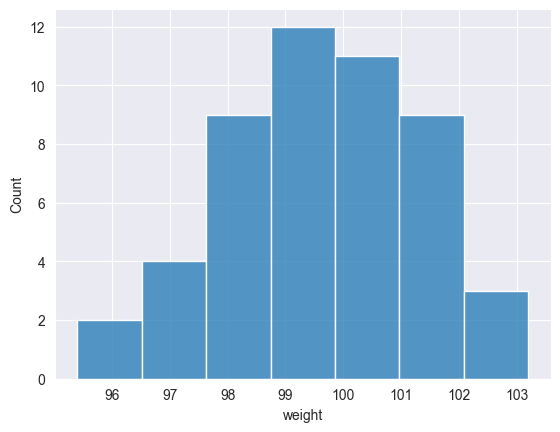

In [4]:
# Graphical Visualization
sns.histplot(data=df1,x=df1['weight'])

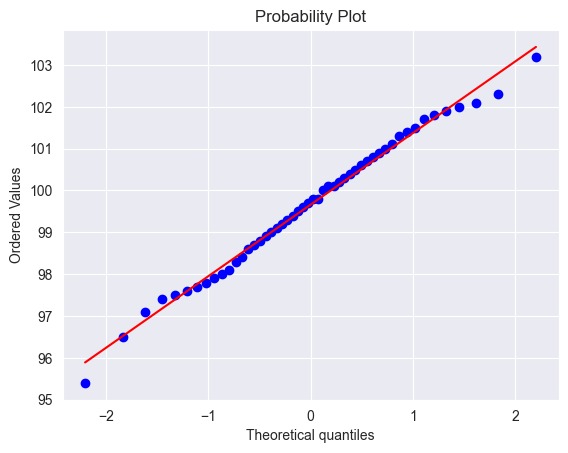

In [5]:
# Q-Q Plot
st.probplot(df1['weight'], dist="norm", plot=plt)
plt.show()

In [6]:
# Test for Skewness and Kurtosis
# Normally Distributed Data should have skewness close to 0 and Excess Kurtosis close to 0..

print(f'The Skewness is {st.skew(df1["weight"])}')
print(f'The Kurtosis is {st.kurtosis(df1["weight"])}')

The Skewness is -0.19429874209466175
The Kurtosis is -0.4142858489906396


A skewness value of -0.19 indicates a slight skew to the left. This means that the left tail of the distribution is slightly longer or fatter than the right tail. Generally, if the skewness is less than -1 or greater than 1, the distribution is highly skewed. A value between -0.5 and 0.5 usually indicates a fairly symmetrical distribution. Therefore, skewness of -0.19 suggests that data is approximately symmetric, but with a very slight left skew.

Excess Kurtosis of -0.41 indicates lighter or thinner tails and a flatter peak than the normal distribution. This indicates a lower chance of extreme results happening as compared to the normal distribution.

From Above Tests for Normality, it can be concluded that the data is very close to a normal distribution and statistical test such as t-test can be performed.

### <span style = 'color:orange'>3.3 Hypothesis Testing

In [7]:
# Compute the mean of the chocolate bar's weight
df1['weight'].mean()

99.66000000000003

### <span style = 'color:orange'>3.4 Define Null and Alternative Hypothesis

Null Hypothesis: The average weight of the chocolate bars is equal to 100.

Alternative Hypothesis: The average weight of the chocolate is not equal to 100.

The sample size is greater than 30 but the population standard deviation is unknown, therefore, using t-test instead of z-test.

### <span style = 'color:orange'>3.5 Perform 2-tailed one Sample t-test

In [8]:
# Perform 2-tailed one sample t-test
t_value, p_value = st.ttest_1samp(df1['weight'],100)

In [9]:
# Interpret the Results
p_value_reader(p_value,.05)  # Using 95% confidence interval or .05 significance level

0.15719957282963568
Fail to Reject the Null Hypothesis


### <span style = 'color:orange'>3.6 Conclusion:

The sample does not provide strong evidence that the average weight of the bar is statistically different from 100 grams, and therefore we cannot reject the Null Hypothesis. There is a 15% chance to see the observed data if null hypothesis were true.

# <span style = 'color:green'>4. Study the Chocolate Bar Thickness Improvements

### <span style = 'color:orange'>4.1 Load Chocolate Thickness Data

In [10]:
df2 = pd.read_csv('chocolate_thickness.csv')
df2.head()

,before,after
0,9.4,9.6
1,8.8,8.9
2,10.1,10.3
3,9.3,9.2
4,9.9,10.0


The table above shows the chocolate thickness before and after process change.
Since this is a paired data, the normality test can be conducted on difference between paired observations.

### <span style = 'color:orange'>4.2 Define Null and Alternative Hypothesis

Define the Null Hypothesis: The thickness of the new batch is not higher than the previous one.

Define the Alternative Hypothesis: The thickness of the new batch is higher than the previous one.

### <span style = 'color:orange'>4.3 Test for Normality

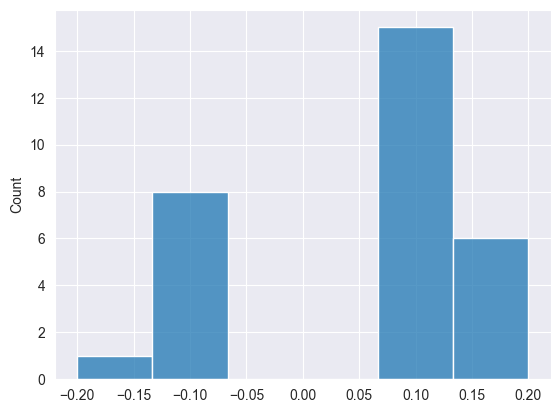

In [11]:
sns.histplot(data=df2,x=df2['after']-df2['before']);

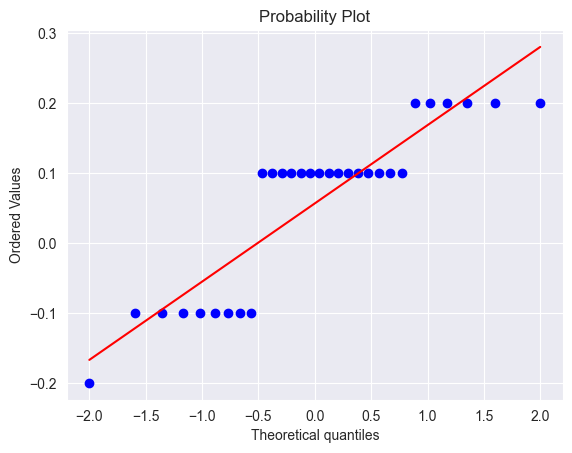

In [12]:
st.probplot(df2['after']-df2['before'], dist="norm", plot=plt)
plt.show()

Wilcoxon Signed-Rank Test, which is a non-parametric alternative to the paired t-test, can be used as the differences did not follow a normal distribution.

### <span style = 'color:orange'>4.4 Perform Wilcoxon Signed-Rank Test

In [13]:
w_statistic, p_value = st.wilcoxon(df2['after'], df2['before'], alternative = 'greater')

print(f"W-statistic: {w_statistic}")
print(f"p-value: {p_value}")


W-statistic: 344.5
p-value: 0.010424925945699215


In [14]:
p_value_reader(p_value,alpha=.05)

0.010424925945699215
Reject the Null Hypothesis


### <span style = 'color:orange'>4.5 Conclusion:

This shows that we can reject the null hypothesis in favor of alternative hypothesis. This shows that the process change has led to increase in bar thickness and the difference is statistically high.

If the difference had followed a normal distribution, one tailed paired t-test can be used with the following code:
t_value,p_value = st.ttest_rel(df2['after'],df2['before'],alternative = 'greater')

# <span style = 'color:green'>5. Investigate the New Sugar Substitute Effectiveness

### <span style = 'color:orange'>5.1 Load Chocolate Sweetness Data

In [15]:
df3 = pd.read_csv('chocolate_sweetness.csv')
df3

,regular_sugar,sugar_substitute
0,35.4,34.0
1,33.8,32.5
2,37.1,35.8
3,36.3,35.2
4,34.9,34.3
5,35.7,34.9
6,34.6,33.7
7,35.2,34.0
8,36.0,35.3
9,37.1,36.1


### <span style = 'color:orange'>5.2 Define Null and Alternative Hypothesis

Define the Null Hypothesis: The sweetness of the chocolate bars using the sugar substitute is same as the one with regular sugar.

Define the Alternative Hypothesis: The sweetness of the chocolate bars using the sugar substitute is not the same as the one with regular sugar.

### <span style = 'color:orange'>5.3 Levene's Test to Assess Difference in Variances

In [16]:
# Using the Levene's test to assess whether both series have similar variances for two independent groups
levene_stat,levene_p_value = st.levene(df3['sugar_substitute'],df3['regular_sugar'])

if levene_p_value < 0.05:
    print("Reject the null hypothesis. Variances are unequal.")
    print("Perform Welch's Test")
else:
    print("Fail to reject the null hypothesis. Variances can be assumed equal.")
    print("Perform T-Test for 2 samples")

Fail to reject the null hypothesis. Variances can be assumed equal.
Perform T-Test for 2 samples


### <span style = 'color:orange'>5.4 Perform Two Sample Independent T-Test

In [17]:
# Perform Independent two sample t-test
t_statistic, p_value = st.ttest_ind(df3['sugar_substitute'],
                                    df3['regular_sugar'],  # comparing two samples - sugar substitute and regular sugar
                                    equal_var=True,  # Assuming that population variance for both samples are equal
                                    alternative = 'two-sided')  # Specifying alternative hypothesis that population means for sugar substitute and regular sugar are not equal

# Interpret the results
p_value_reader(p_value, 0.05)

0.0020979639639374394
Reject the Null Hypothesis


### <span style = 'color:orange'>5.5 Conclusion:

The sweetness of the regular sugar and substitute sugar is not same.

# <span style = 'color:green'>6. Decide Which Chocolate to Invest in More

Two new flavor of chocolates are introduced - Spicy Cinnamon and Cool Mint. A survey is done with different customers to find their preferred among the two and the observations are recorded below. Management wants to know which one is more preferred and to invest in more.

We can check if the frequency of preference of one is different from another. In this case, we can use Chi Square Test for Goodness of fit. The Chi-square test for goodness of fit tests the hypothesis that the observed proportions for a categorical variable differ from a specified set of proportions. Assuming that there is no preference, we would expect the proportions to be the same for each flavor.

### <span style = 'color:orange'>6.1 Load the Chocolate Preference Data

In [18]:
df4 = pd.read_csv('chocolate_preferences.csv')
df4

,Preference
0,Spicy Cinnamon
1,Cool Mint
2,Spicy Cinnamon
3,Spicy Cinnamon
4,Cool Mint
...,...
94,Cool Mint
95,Spicy Cinnamon
96,Cool Mint
97,Cool Mint


### <span style = 'color:orange'>6.2 Define Null and Alternative Hypothesis

Null Hypothesis: The observed frequencies do not differ from expected frequencies, i.e., people does not prefer one flavor over another.

Alternative Hypothesis: There is significant statistical difference from observed and expected frequency, i.e., people favor one flavor over another.

### <span style = 'color:orange'>6.3 Perform Chi-Square Test

In [19]:
# Perform Chi-Square Test

observed_frequencies = df4['Preference'].value_counts()  # Finding out the counts of each flavor
expected_frequencies = [len(df4)/2,len(df4)/2]  # Half of total for each flavor
chi_square_stat, chi_p_value = st.chisquare(observed_frequencies, expected_frequencies)

# Interpret the Result
p_value_reader(chi_p_value,alpha=.01)  # Using 99% confidence level

0.48172771631662636
Fail to Reject the Null Hypothesis


### <span style = 'color:orange'>6.4 Conclusion:

There is no strong evidence of chocolate preference and both should receive same investment. It is possible that a preference could be detected with more data or under different conditions.

# <span style="color: green">7. Evaluating the Yearly Performace of Production Shifts

### <span style = 'color:orange'>7.1 Load the Chocolate Production Data

In [20]:
df5 = pd.read_csv('chocolate_production.csv')
df5

,Month,Chocolate_A,Chocolate_B,Chocolate_C
0,1,100,110,120
1,2,105,115,125
2,3,95,105,115
3,4,90,100,110
4,5,105,115,125
5,6,100,110,120
6,7,95,105,115
7,8,90,100,110
8,9,105,115,125
9,10,100,110,120


The dataset shows the product performance for 3 shifts. ANOVA test can be used to determine if there is significant difference in the average production of three shifts.

### <span style = 'color:orange'>7.2 Perform One Way ANOVA Test

In [21]:
# Perform One-Way ANOVA Test
F_statistic, p_value = st.f_oneway(df5['Chocolate_A'], df5['Chocolate_B'], df5['Chocolate_C'])
# Interpret the results
p_value_reader(p_value, 0.05)  # Using 95% confidence level.

6.544720714806728e-09
Reject the Null Hypothesis


### <span style = 'color:orange'>7.3 Conclusion:

Production is statistically not same in 3 shifts.

# <span style="color: green">8. Confirm if Customer Satisfaction and Sales are Connected

### <span style = 'color:orange'>8.1 Load the Chocolate Satisfaction Data

In [22]:
df6 = pd.read_csv('chocolate_satisfaction.csv')
df6.head()

,Region,Chocolate_A_Sales,Chocolate_B_Sales,Chocolate_C_Sales,Chocolate_A_Satisfaction,Chocolate_B_Satisfaction,Chocolate_C_Satisfaction
0,1,100,110,120,90,85,95
1,2,105,115,125,95,88,98
2,3,95,105,115,88,83,93
3,4,90,100,110,80,75,85
4,5,105,115,125,92,87,97


### <span style = 'color:orange'>8.2 Perform MANOVA Test

In [23]:
from statsmodels.multivariate.manova import MANOVA
manova = MANOVA.from_formula('Chocolate_A_Sales + Chocolate_B_Sales + Chocolate_C_Sales + Chocolate_A_Satisfaction + Chocolate_B_Satisfaction + Chocolate_C_Satisfaction ~ Region', data=df6)
result = manova.mv_test()
print(result)

                             Multivariate linear model
                                                                                    
------------------------------------------------------------------------------------
       Intercept               Value        Num DF Den DF       F Value       Pr > F
------------------------------------------------------------------------------------
          Wilks' lambda              0.0000 5.0000 6.0000 57800209121331.3594 0.0000
         Pillai's trace              1.0000 5.0000 6.0000 57800209121331.3672 0.0000
 Hotelling-Lawley trace 48166840934442.8047 5.0000 6.0000 57800209121331.3672 0.0000
    Roy's greatest root 48166840934442.8047 5.0000 6.0000 57800209121331.3672 0.0000
------------------------------------------------------------------------------------
                                                                                    
-----------------------------------------------------------------------------------------
     

In [24]:
#Interpret p_value
p_value = result.results['Region']['stat'].values[1, -1]
p_value_reader(p_value, 0.05)

0.8687722300455106
Fail to Reject the Null Hypothesis


### <span style = 'color:orange'>8.3 Conclusion:

No strong evidence that the regions have similar sales and satisfaction.